In [3]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
from google.colab import drive
import pandas as pd

# Monta tu Google Drive
drive.mount('/content/drive')

# Define la ruta completa del archivo en Google Drive
archivo ='/content/drive/MyDrive/modelo/Twitter_Data.csv' # Reemplaza con tu ruta

# Lee el archivo CSV usando pandas
df = pd.read_csv(archivo)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,Negativo
1,talk all the nonsense and continue all the dra...,Neutro
2,what did just say vote for modi welcome bjp t...,Positivo
3,asking his supporters prefix chowkidar their n...,Positivo
4,answer who among these the most powerful world...,Positivo


In [ ]:
df

,clean_text,category
0,when modi promised “minimum government maximum...,Negativo
1,talk all the nonsense and continue all the dra...,Neutro
2,what did just say vote for modi welcome bjp t...,Positivo
3,asking his supporters prefix chowkidar their n...,Positivo
4,answer who among these the most powerful world...,Positivo
...,...,...
162963,why these 456 crores paid neerav modi not reco...,Negativo
162964,dear rss terrorist payal gawar what about modi...,Negativo
162965,did you cover her interaction forum where she ...,Neutro
162966,there big project came into india modi dream p...,Neutro


In [ ]:
df = df[['category', 'clean_text']].copy()

In [ ]:
df.head()

,sentimiento,review_es
0,positivo,Uno de los otros críticos ha mencionado que de...
1,positivo,Una pequeña pequeña producción.La técnica de f...
2,positivo,Pensé que esta era una manera maravillosa de p...
3,negativo,"Básicamente, hay una familia donde un niño peq..."
4,positivo,"El ""amor en el tiempo"" de Petter Mattei es una..."


<Axes: >

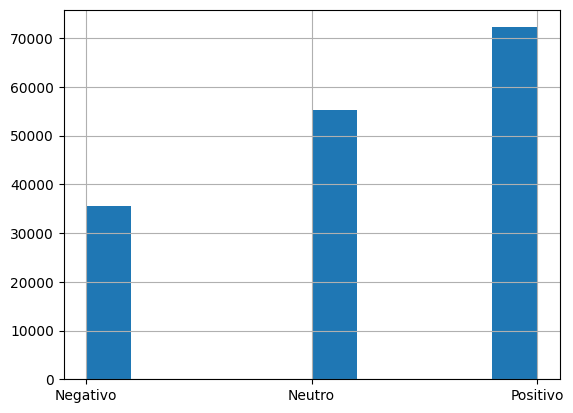

In [ ]:
df['category'].hist()

In [ ]:
target_map = {'Positivo': 1, 'Negativo': 0, 'Neutro': 2}
df['target'] = df['category'].map(target_map)

In [ ]:
df.head()

,sentimiento,review_es,target
0,positivo,Uno de los otros críticos ha mencionado que de...,1
1,positivo,Una pequeña pequeña producción.La técnica de f...,1
2,positivo,Pensé que esta era una manera maravillosa de p...,1
3,negativo,"Básicamente, hay una familia donde un niño peq...",0
4,positivo,"El ""amor en el tiempo"" de Petter Mattei es una...",1


In [ ]:
df_train, df_test = train_test_split(df)

In [ ]:
Y_train = df_train['target']
Y_test = df_test['target']

In [ ]:
df_train

,category,clean_text,target
41561,Positivo,will narendra modis announcement prove the big...,1
104116,Positivo,what modi wants absolute power but not happeni...,1
57303,Neutro,modi will not let you until you deposit lacs o...,2
128159,Neutro,before 2014 modi promised jobs every year for ...,2
159802,Positivo,can anyone but diehard modi bhakt interested t...,1
...,...,...,...
32107,Negativo,these scum have nothing with the fuck narendra...,0
112046,Negativo,indian investigators have found that indian a...,0
14522,Negativo,dear friend takes one person build organizatio...,0
106069,Positivo,the modi government has only been able spread ...,1


In [ ]:
df_test

,category,clean_text,target
139973,Neutro,yes achhe din for people and terror the hearts...,2
112271,Positivo,lists four economic reforms five years the nar...,1
67696,Positivo,• when modi was still sweeping the floors rss ...,1
44767,Negativo,modi’ middle east deals snub iran foreign policy,0
143249,Negativo,this time its not wave sucker you losers are s...,0
...,...,...,...
41655,Neutro,shri narendra modis address the nation via,2
71476,Positivo,now people are literally asking simple questio...,1
96172,Positivo,dear this capability was there from 2011 not s...,1
24753,Positivo,thankyou naidu every passing day tdp coming cl...,1


In [ ]:
vectorizer = TfidfVectorizer(max_features=2000)

In [ ]:
X_train = vectorizer.fit_transform(df_train['clean_text'])

In [ ]:
X_train

<37500x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 3462324 stored elements in Compressed Sparse Row format>

In [ ]:
X_test = vectorizer.transform(df_test['clean_text'])
X_test

<40742x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 589982 stored elements in Compressed Sparse Row format>

In [ ]:
Y_train = df_train['target']
Y_test = df_test['target']

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)
print("Train acc:", model.score(X_train, Y_train))
print("Test acc:", model.score(X_test, Y_test))

Train acc: 0.8961513916842571
Test acc: 0.8922978744293358


In [ ]:
P_train = model.predict(X_train)
P_test = model.predict(X_test)

In [ ]:
cm = confusion_matrix(Y_train, P_train, normalize='true')
cm

array([[0.7571504 , 0.12150026, 0.12134933],
       [0.03704727, 0.90223278, 0.06071994],
       [0.00830076, 0.01462285, 0.9770764 ]])

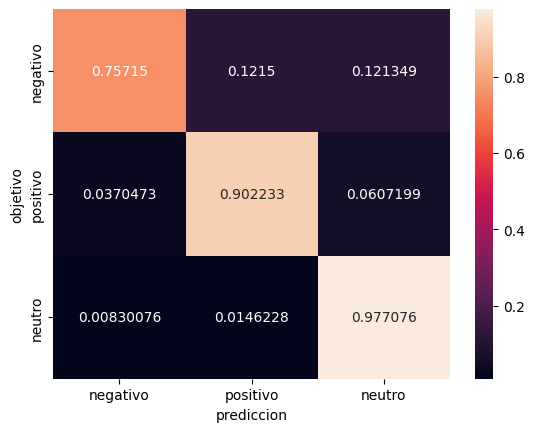

In [ ]:
def plot_cm(cm):
    classes = ['negativo', 'positivo', 'neutro']
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    ax = sn.heatmap(df_cm, annot=True, fmt='g')
    ax.set_xlabel("prediccion")
    ax.set_ylabel("objetivo")
plot_cm(cm)


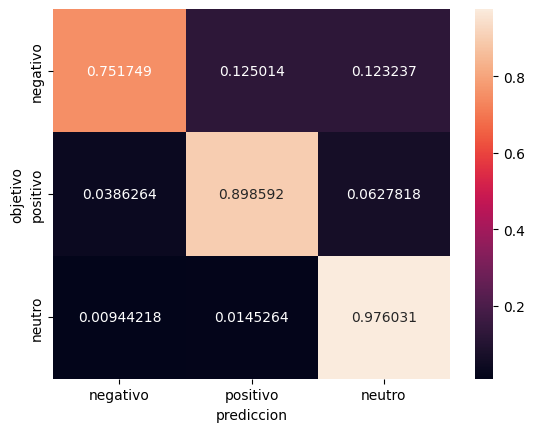

In [ ]:

cm_test = confusion_matrix(Y_test, P_test, normalize='true')
plot_cm(cm_test)

In [ ]:
word_index_map = vectorizer.vocabulary_
word_index_map

{'come': 352,
 'back': 167,
 'mrmodi': 1178,
 'big': 217,
 'are': 124,
 'still': 1673,
 'deep': 465,
 'many': 1095,
 'bank': 175,
 'fraud': 694,
 'though': 1774,
 'small': 1624,
 'makes': 1084,
 'there': 1762,
 'kashmir': 951,
 'issue': 911,
 'also': 85,
 'created': 420,
 'nehru': 1209,
 'say': 1532,
 'abt': 34,
 'this': 1772,
 'dont': 529,
 'have': 796,
 'dare': 446,
 'about': 29,
 'only': 1254,
 'didnt': 505,
 'speak': 1644,
 'him': 823,
 'under': 1832,
 'modis': 1160,
 'govt': 753,
 'surgical': 1704,
 'strikes': 1681,
 'modi': 1157,
 'dangerous': 445,
 'for': 679,
 'world': 1963,
 'pak': 1280,
 'peace': 1301,
 'country': 410,
 'launched': 998,
 'antisatellite': 111,
 'missile': 1148,
 'after': 64,
 'always': 87,
 'take': 1715,
 'both': 246,
 'ambani': 89,
 'was': 1897,
 'very': 1862,
 'close': 349,
 'show': 1594,
 'one': 1252,
 'picture': 1316,
 'article': 134,
 'where': 1926,
 'has': 787,
 'given': 734,
 'please': 1328,
 'read': 1444,
 'the': 1756,
 'history': 833,
 'first': 666,
 

In [ ]:
model.coef_[0]

array([ 0.27861931,  0.13562225, -0.66404598, ...,  0.23590595,
       -0.12403398,  0.11150506])

In [ ]:
corte = 4

print("Palabras más positivas:")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight > corte:
        print(word, weight)

Palabras más positivas:
small 5.553387004327554
dangerous 7.4725929085955505
single 5.01192138448305
failed 8.173293234232007
due 6.042872995366551
down 7.516654098940011
least 5.813237168349639
stupid 9.589154361410673
dirty 5.857372535324295
blind 6.045939780767284
black 6.297490024952815
criminal 5.603415969149641
crying 4.0904660034150915
killed 5.346661598589721
hard 7.095467918092555
sick 5.676115573386473
other 8.556648347559122
poor 9.590513021619719
hate 11.332174388314021
mean 6.6783866600913475
serious 5.674242844211284
game 6.409627780858113
dumb 5.913222243482318
bad 8.55808906702919
missing 4.673496648186792
late 5.670873669357334
past 6.0633929091849375
desperate 6.509865295741333
idiot 8.032813225907605
wrong 7.818225765316486
seriously 5.314190045772177
behind 6.7495221386163715
tough 5.793043604620809
failure 6.291210261406624
propaganda 4.388878629336232
fail 5.644629294095287
forced 5.033494270089938
destroy 5.149803130370498
few 5.883349013319556
corrupt 6.97421379

In [ ]:
print("Palabras más negativas:")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight < -corte:
        print(word, weight)

Palabras más negativas:
best -6.595386382120318
more -4.389239649568309
proud -4.704233161862984
many -4.741878200236741
great -4.678722791867208
lol -4.191718350918772


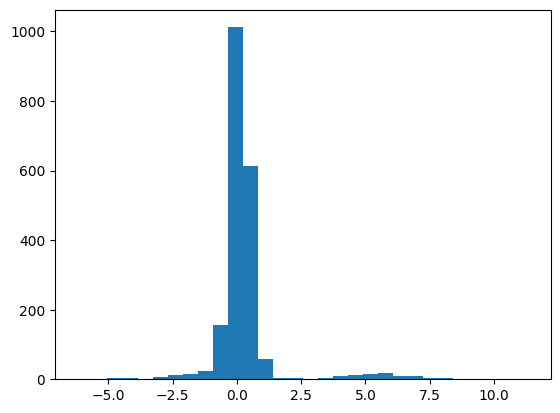

In [ ]:
plt.hist(model.coef_[0], bins=30);

In [ ]:
prueba = ["I feel sad", "Its lovely", "its good", "la"]

# Transformar la entrada con el vectorizador
x = vectorizer.transform(prueba)


In [ ]:
# Predecir con el modelo
P = model.predict(x)

In [ ]:
# Obtener las clases del modelo
clases = model.classes_

In [ ]:
# Mostrar la clase predicha
for i in range (len(prueba)): #positivo': 1, 'negativo': 0, 'neutro': 2
    if clases[P[i]] == 0:
        print(f"el Comentario: '{prueba[i]}' es: negativo")
    if clases[P[i]] == 1:
        print(f"el Comentario: '{prueba[i]}' es: positivo")
    else:
        print(f"el Comentario: '{prueba[i]}' es: neutro")

el Comentario: 'I feel sad' es: negativo
el Comentario: 'I feel sad' es: neutro
el Comentario: 'Its lovely' es: neutro
el Comentario: 'its good' es: positivo
el Comentario: 'la' es: neutro
